## Importing Data 

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data = pd.read_csv(url, names=names)

# Check for missing values
print(data.isnull().sum())
data = data.drop(data[data["ca"] == "?"].index)
data = data.drop(data[data["thal"] == "?"].index)
data["ca"] = data["ca"].astype('float')
data["thal"] = data["thal"].astype('float')

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


## Data Analysis

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


In [3]:
for i in data.columns:
  data[i] = data[i].astype('int')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       297 non-null    int32
 1   sex       297 non-null    int32
 2   cp        297 non-null    int32
 3   trestbps  297 non-null    int32
 4   chol      297 non-null    int32
 5   fbs       297 non-null    int32
 6   restecg   297 non-null    int32
 7   thalach   297 non-null    int32
 8   exang     297 non-null    int32
 9   oldpeak   297 non-null    int32
 10  slope     297 non-null    int32
 11  ca        297 non-null    int32
 12  thal      297 non-null    int32
 13  target    297 non-null    int32
dtypes: int32(14)
memory usage: 18.6 KB


## Model Building & Evaluation

In [5]:
# Split the data into features and target
X = data.drop('target', axis=1)
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_train, y_train)

# PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_train)

# Print explained variance ratio for PCA
print(pca.explained_variance_ratio_)

# Logistic Regression model with LDA
lr_lda_model = LogisticRegression()
lr_lda_model.fit(X_lda, y_train)

# Logistic Regression model with PCA
lr_pca_model = LogisticRegression()
lr_pca_model.fit(X_pca, y_train)

# Make predictions on test set
y_pred_lr = lr_model.predict(X_test)
y_pred_proba_lr = lr_model.predict_proba(X_test)

y_pred_dt = dt_model.predict(X_test)
y_pred_proba_dt = dt_model.predict_proba(X_test)

y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)

y_pred_lr_lda = lr_lda_model.predict(lda.transform(X_test))
y_pred_proba_lr_lda = lr_lda_model.predict_proba(lda.transform(X_test))

y_pred_lr_pca = lr_pca_model.predict(pca.transform(X_test))
y_pred_proba_lr_pca = lr_pca_model.predict_proba(pca.transform(X_test))

# Print performance metrics for each model
print('Logistic Regression:')
print('ROC AUC:', roc_auc_score(y_test, y_pred_proba_lr,multi_class='ovr'))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred_lr))
print('Classification Report:', classification_report(y_test, y_pred_lr))

print('Decision Tree:')
print('ROC AUC:', roc_auc_score(y_test, y_pred_proba_dt,multi_class='ovr'))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred_dt))
print('Classification Report:', classification_report(y_test, y_pred_dt))

[0.22119704 0.12701208 0.10373281 0.08891417 0.07649114]
Logistic Regression:
ROC AUC: 0.7630062633514766
Confusion Matrix: [[46  2  0  1  0]
 [ 9  2  1  4  1]
 [ 3  2  2  1  2]
 [ 1  4  3  0  3]
 [ 2  0  0  1  0]]
Classification Report:               precision    recall  f1-score   support

           0       0.75      0.94      0.84        49
           1       0.20      0.12      0.15        17
           2       0.33      0.20      0.25        10
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         3

    accuracy                           0.56        90
   macro avg       0.26      0.25      0.25        90
weighted avg       0.49      0.56      0.51        90

Decision Tree:
ROC AUC: 0.5877735487144238
Confusion Matrix: [[37  7  3  1  1]
 [ 8  2  4  3  0]
 [ 1  3  2  2  2]
 [ 1  5  2  2  1]
 [ 0  1  0  1  1]]
Classification Report:               precision    recall  f1-score   support

           0       0.79      0.76      0.77

In [6]:
print('Random Forest:')
print('ROC AUC:', roc_auc_score(y_test, y_pred_proba_rf,multi_class='ovr'))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred_rf))
print('Classification:', classification_report(y_test, y_pred_dt))


Random Forest:
ROC AUC: 0.7666667714075076
Confusion Matrix: [[48  1  0  0  0]
 [10  1  4  2  0]
 [ 3  3  3  1  0]
 [ 3  4  2  1  1]
 [ 2  1  0  0  0]]
Classification:               precision    recall  f1-score   support

           0       0.79      0.76      0.77        49
           1       0.11      0.12      0.11        17
           2       0.18      0.20      0.19        10
           3       0.22      0.18      0.20        11
           4       0.20      0.33      0.25         3

    accuracy                           0.49        90
   macro avg       0.30      0.32      0.31        90
weighted avg       0.50      0.49      0.50        90



In [7]:
print('Logistic Regression with LDA:')
print('ROC AUC:', roc_auc_score(y_test, y_pred_proba_lr_lda,multi_class='ovr'))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred_lr_lda))
print('Classification Report:', classification_report(y_test, y_pred_lr_lda))

print('Logistic Regression with PCA:')
print('ROC AUC:', roc_auc_score(y_test, y_pred_proba_lr_pca,multi_class='ovr'))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred_lr_pca))
print('Classification Report:', classification_report(y_test, y_pred_lr_pca))


Logistic Regression with LDA:
ROC AUC: 0.7978428686480225
Confusion Matrix: [[47  1  0  0  1]
 [ 8  3  2  3  1]
 [ 3  2  2  1  2]
 [ 1  4  3  1  2]
 [ 2  0  0  1  0]]
Classification Report:               precision    recall  f1-score   support

           0       0.77      0.96      0.85        49
           1       0.30      0.18      0.22        17
           2       0.29      0.20      0.24        10
           3       0.17      0.09      0.12        11
           4       0.00      0.00      0.00         3

    accuracy                           0.59        90
   macro avg       0.30      0.29      0.29        90
weighted avg       0.53      0.59      0.55        90

Logistic Regression with PCA:
ROC AUC: 0.810623670883904
Confusion Matrix: [[48  0  0  0  1]
 [ 9  3  2  3  0]
 [ 4  1  1  2  2]
 [ 1  2  4  1  3]
 [ 1  1  0  1  0]]
Classification Report:               precision    recall  f1-score   support

           0       0.76      0.98      0.86        49
           1       0.43

## Region of Convergence

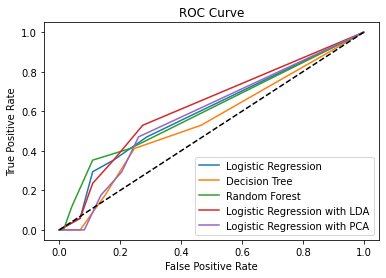

In [9]:
#Plot ROC curve for each model
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, lr_model.predict(X_test),pos_label=1)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_model.predict(X_test),pos_label=1)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_model.predict(X_test),pos_label=1)
fpr_lr_lda, tpr_lr_lda, thresholds_lr_lda = roc_curve(y_test, lr_lda_model.predict(lda.transform(X_test)),pos_label=1)
fpr_lr_pca, tpr_lr_pca, thresholds_lr_pca = roc_curve(y_test, lr_pca_model.predict(pca.transform(X_test)),pos_label=1)

import matplotlib.pyplot as plt
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_lr_lda, tpr_lr_lda, label='Logistic Regression with LDA')
plt.plot(fpr_lr_pca, tpr_lr_pca, label='Logistic Regression with PCA')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()